In [1]:
from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup

import os
import numpy as np
import matplotlib.pyplot as plt
import torch

PARENT_PATH = setup.PARENT_PATH
ISONET_PATH = os.path.join(PARENT_PATH, 'data/isoNet/')

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
cet_path = os.path.join(PARENT_PATH, 'data/raw_cryo-ET/tomo02.mrc') 

tomo_data = read_array(cet_path)
tomo_data.shape

(464, 928, 928)

In [3]:
z,y,x = tomo_data.shape

In [4]:
dummy_tomo = tomo_data[z//4:3*z//4, y//4:3*y//4, x//4:3*x//4]
dummy_tomo.shape

(232, 464, 464)

(array([2.4000000e+01, 2.4700000e+02, 1.3240000e+03, 2.6857000e+04,
        1.6993449e+07, 3.2630923e+07, 2.9504300e+05, 6.9400000e+02,
        9.9000000e+01, 1.2000000e+01]),
 array([-3.4371453e+10, -2.7661531e+10, -2.0951609e+10, -1.4241687e+10,
        -7.5317642e+09, -8.2184192e+08,  5.8880804e+09,  1.2598003e+10,
         1.9307926e+10,  2.6017847e+10,  3.2727769e+10], dtype=float32),
 <BarContainer object of 10 artists>)

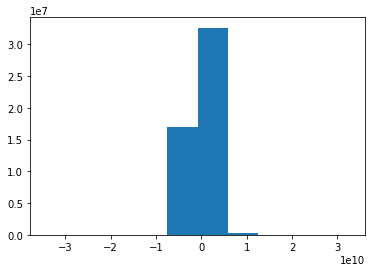

In [5]:
plt.hist(dummy_tomo.flatten())

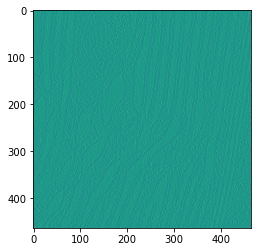

In [7]:
plt.imshow(dummy_tomo[232//2])

In [8]:
filename = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo02_dummy.mrc')
write_array(dummy_tomo, filename)